<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P7E10_normal_sinmuysigma_KS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

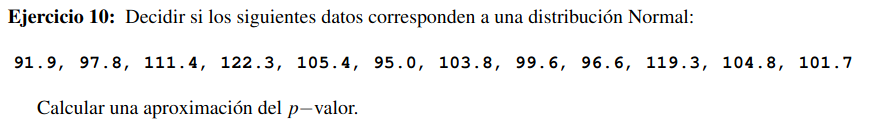

 D manual |  p manual |   D scipy |   p scipy
--------------------------------------------------
   0.1964 |    0.6736 |    0.1964 |    0.6747


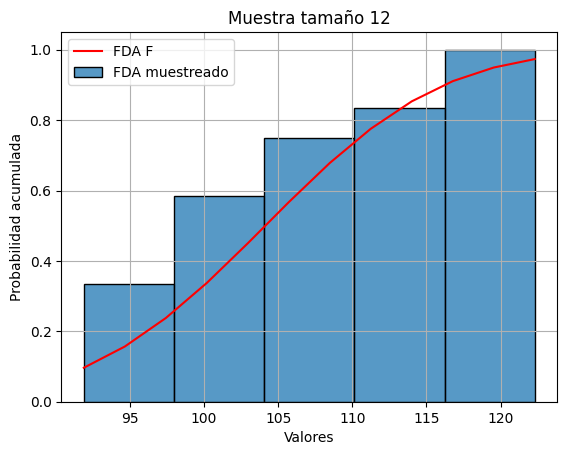

In [59]:
from numpy import sqrt, log, linspace, inf, exp
from random import random, seed, gammavariate, gauss
from scipy.stats import kstest
from scipy.special import erf
import seaborn as sns
import matplotlib.pyplot as plt

N_SIM = 100_000
MUESTRA_EMPIRICA = [91.9, 97.8, 111.4, 122.3, 105.4, 95.0, 103.8, 99.6, 96.6, 119.3, 104.8, 101.7]
TAM_MUESTRA = len(MUESTRA_EMPIRICA)

def estimadores_mu_sigma(muestra):
    tam_muestra = len(muestra)
    media_muestral = sum(muestra) / tam_muestra
    S = sqrt(sum((x - media_muestral) ** 2 for x in muestra) / (tam_muestra - 1))
    return media_muestral, S

MU_ESTIMADA, SIGMA_ESTIMADA = estimadores_mu_sigma(MUESTRA_EMPIRICA)

def Normal_rechazo(mu=MU_ESTIMADA, sigma=SIGMA_ESTIMADA):
    while True:
        Y1 = -log(1 - random())
        Y2 = -log(1 - random())
        if Y2 >=(Y1-1) ** 2 / 2:
            if random() < 0.5:
                return Y1 * sigma + mu
            else: return -Y1 * sigma + mu

def F_fda(x, mu=MU_ESTIMADA, sigma=SIGMA_ESTIMADA):
    z = (x - mu) / (sigma * sqrt(2))
    return 0.5 * (1 + erf(z))

def F_muestreador(n, *args):
    return [Normal_rechazo(*args) for _ in range(n)]

def estadistico_KS(muestra, F_fda):
    tamano_muestra = len(muestra)
    muestra_ordenada = sorted(muestra)
    D_max =  -inf

    for j, y in enumerate(muestra_ordenada, start=1):
        F_y = F_fda(y)
        D_minus = F_y - (j - 1) / tamano_muestra
        D_plus = j / tamano_muestra - F_y
        D_max = max(D_max, D_minus, D_plus)

    return D_max

def estimar_Pvalor_KS(muestra_empirica):
    tamano_muestra = len(muestra_empirica)
    d_empirico = estadistico_KS(muestra_empirica, F_fda)
    cuenta = 0
    for _ in range(N_SIM):

        # F_muestra = F_muestreador(tamano_muestra)
        # d_simulado = estadistico_KS(F_muestra, F_fda)

        U_muestra = [random() for _ in range(tamano_muestra)]
        d_simulado = estadistico_KS(U_muestra, lambda x: x)

        if d_empirico <= d_simulado:
            cuenta += 1
    return cuenta / N_SIM


seed(1)
p_valor = estimar_Pvalor_KS(MUESTRA_EMPIRICA)
d_estadistico = estadistico_KS(MUESTRA_EMPIRICA, F_fda)

d_correcto, p_valor_correcto = kstest(MUESTRA_EMPIRICA, cdf=F_fda)


print(f"{'D manual':>9} | {'p manual':>9} | {'D scipy':>9} | {'p scipy':>9}")
print("-" * 50)

print(f"{d_estadistico:9.4f} | {p_valor:9.4f} | {d_correcto:9.4f} | {p_valor_correcto:9.4f}")
dom = linspace(min(MUESTRA_EMPIRICA), max(MUESTRA_EMPIRICA), num=TAM_MUESTRA)
sns.lineplot(x=dom, y=F_fda(dom), label="FDA F", color="red")
sns.histplot(MUESTRA_EMPIRICA, stat="density", cumulative=True, label="FDA muestreado")
plt.title(f"Muestra tamaño {TAM_MUESTRA}")
plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.legend()
plt.grid(True)
plt.show()

 D manual |  p manual |   D scipy |   p scipy
--------------------------------------------------
   0.1964 |    0.6736 |    0.1964 |    0.6747


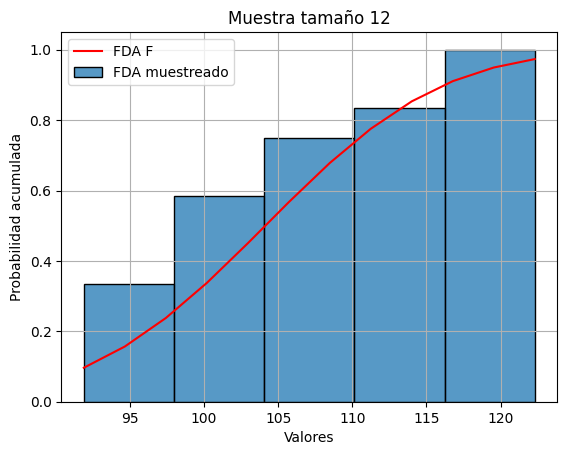

In [60]:

def estimar_Pvalor_KS_exaustivo(muestra_empirica):
    tamano_muestra = len(muestra_empirica)
    d_empirico = estadistico_KS(muestra_empirica, F_fda)
    cuenta = 0
    for _ in range(N_SIM):
        F_muestra = F_muestreador(tamano_muestra)
        mu_sim, sigma_sim = estimadores_mu_sigma(F_muestra)
        F_fda_simulada = lambda x : F_fda(x, mu_sim, sigma_sim)
        d_simulado = estadistico_KS(F_muestra, F_fda_simulada)

        # U_muestra = [random() for _ in range(tamano_muestra)]
        # d_simulado = estadistico_KS(U_muestra, lambda x: x)

        if d_empirico <= d_simulado:
            cuenta += 1
    return cuenta / N_SIM

seed(1)
p_valor = estimar_Pvalor_KS(MUESTRA_EMPIRICA)
d_estadistico = estadistico_KS(MUESTRA_EMPIRICA, F_fda)

d_correcto, p_valor_correcto = kstest(MUESTRA_EMPIRICA, cdf=F_fda)


print(f"{'D manual':>9} | {'p manual':>9} | {'D scipy':>9} | {'p scipy':>9}")
print("-" * 50)

print(f"{d_estadistico:9.4f} | {p_valor:9.4f} | {d_correcto:9.4f} | {p_valor_correcto:9.4f}")
dom = linspace(min(MUESTRA_EMPIRICA), max(MUESTRA_EMPIRICA), num=TAM_MUESTRA)
sns.lineplot(x=dom, y=F_fda(dom), label="FDA F", color="red")
sns.histplot(MUESTRA_EMPIRICA, stat="density", cumulative=True, label="FDA muestreado")
plt.title(f"Muestra tamaño {TAM_MUESTRA}")
plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.legend()
plt.grid(True)
plt.show()